# 基于线性回归的波士顿房价预测实验的数据预处理

# 1.实验介绍  

## 1.1 实验目的
1. 掌握用Pandas进行数据预处理的方法；
2. 熟悉线性回归模型的设计原理以及构建流程；
3. 了解使用高性能数据引擎Blackhole构建线性回归模型的方法。

## 1.2 实验内容

波士顿房价预测是典型的回归分析任务，本实验使用线性回归模型对马萨诸塞州波士顿郊区的房屋信息数据进行训练，并对模型的性能和预测能力进行测试。


## 1.3 实验设计

本实验使用基于最小二乘法的线性回归模型，对波士顿房价进行预测，全流程包括数据处理、模型训练预测、模型评估以及模型持久化等。


----
**说明：**

不同的机器学习任务，使用机器学习框架的代码结构相似。大家掌握了一个任务的实现方法，便很容易在此基础上举一反三。

---


# 2. 实验详细实现

波士顿房价预测实验流程如 **图1** 所示，主要包含如下5个步骤：

1. **数据处理**：包括数据探索、数据清洗（缺失值和异常值处理）、数据集划分和特征工程（数据归一化），以便数据可以被模型正常读取，并具有良好的泛化性；
1. **模型训练**：执行多轮训练不断调试参数，以达到较好的效果；
1. **模型评估**：对训练好的模型进行评估测试；
1. **模型保存**：将模型参数保存到指定位置，便于后续推理或继续训练使用；
1. **模型推理**：使用一组房屋数据预测房价。 

<center><img src='https://ai-studio-static-online.cdn.bcebos.com/7c87a9e7001f496db2457c5a666bf8dfa9a4232a3f764041ad1420c79d72b520' width=700></center>
<center><br>图1 波士顿房价预测实验流程图</br></center>



## 2.1 数据处理

### 2.1.1 数据探索

通过数据探索了解变量间的相互关系和变量与预测值之间的关系，从而帮助后期更好地进行特征工程和建立模型。

本实验使用波士顿房价预测数据集，共506条样本数据，每条样本包含了13种可能影响房价的因素和该类房屋价格的中位数，各字段含义如下： 

<center>
  
| 字段名   | 类型 | 含义  |
| -------- | -------- | -------- | 
| CRIM	| float | 该镇的人均犯罪率 |
| ZN	| float |占地面积超过25,000平方呎的住宅用地比例|
| INDUS	| float |非零售商业用地比例|
| CHAS	| int   |是否邻近 Charles River 1=邻近；0=不邻近|
| NOX	| float |一氧化氮浓度  | 
| RM	| float |每栋房屋的平均客房数 |
| AGE	| float |1940年之前建成的自用单位比例 |
| DIS	| float |到波士顿5个就业中心的加权距离 |
| RAD	| int   |到径向公路的可达性指数 |
| TAX	| int   |全值财产税率  |
| PTRATIO|float | 学生与教师的比例 |
| B	    | float |1000(BK - 0.63)^2，其中BK为黑人占比 |
| LSTAT	| float |低收入人群占比 |
| MEDV	| float |同类房屋价格的中位数 |
  
  </center>

导入环境依赖并预览数据，代码实现如下。


In [16]:
# 导入所需软件包
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 加载数据集
data=pd.read_csv(r"Exp05Bboston_house_prices.csv")
## 下面补充1句代码，预览前5行数据

data[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2.1.2  数据清洗 

对数据集中的缺失值或异常值等情况进行分析和处理，保证数据可以被模型正常读取。

* **缺失值分析**  

通过`isna()`方法判断`dataframe`中各元素是否缺失，然后通过`sum()`方法统计每个字段缺失情况，代码实现如下。

In [17]:
# 查看各字段缺失值统计情况
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* **异常值处理**

通过箱线图直观的显示数据分布，并观测数据中的异常值。箱线图通常由五个统计值组成：最大值、上四分位、中位数、下四分位和最小值。通常，观测到的数据大于最大值或者小于最小值则判断为异常值。

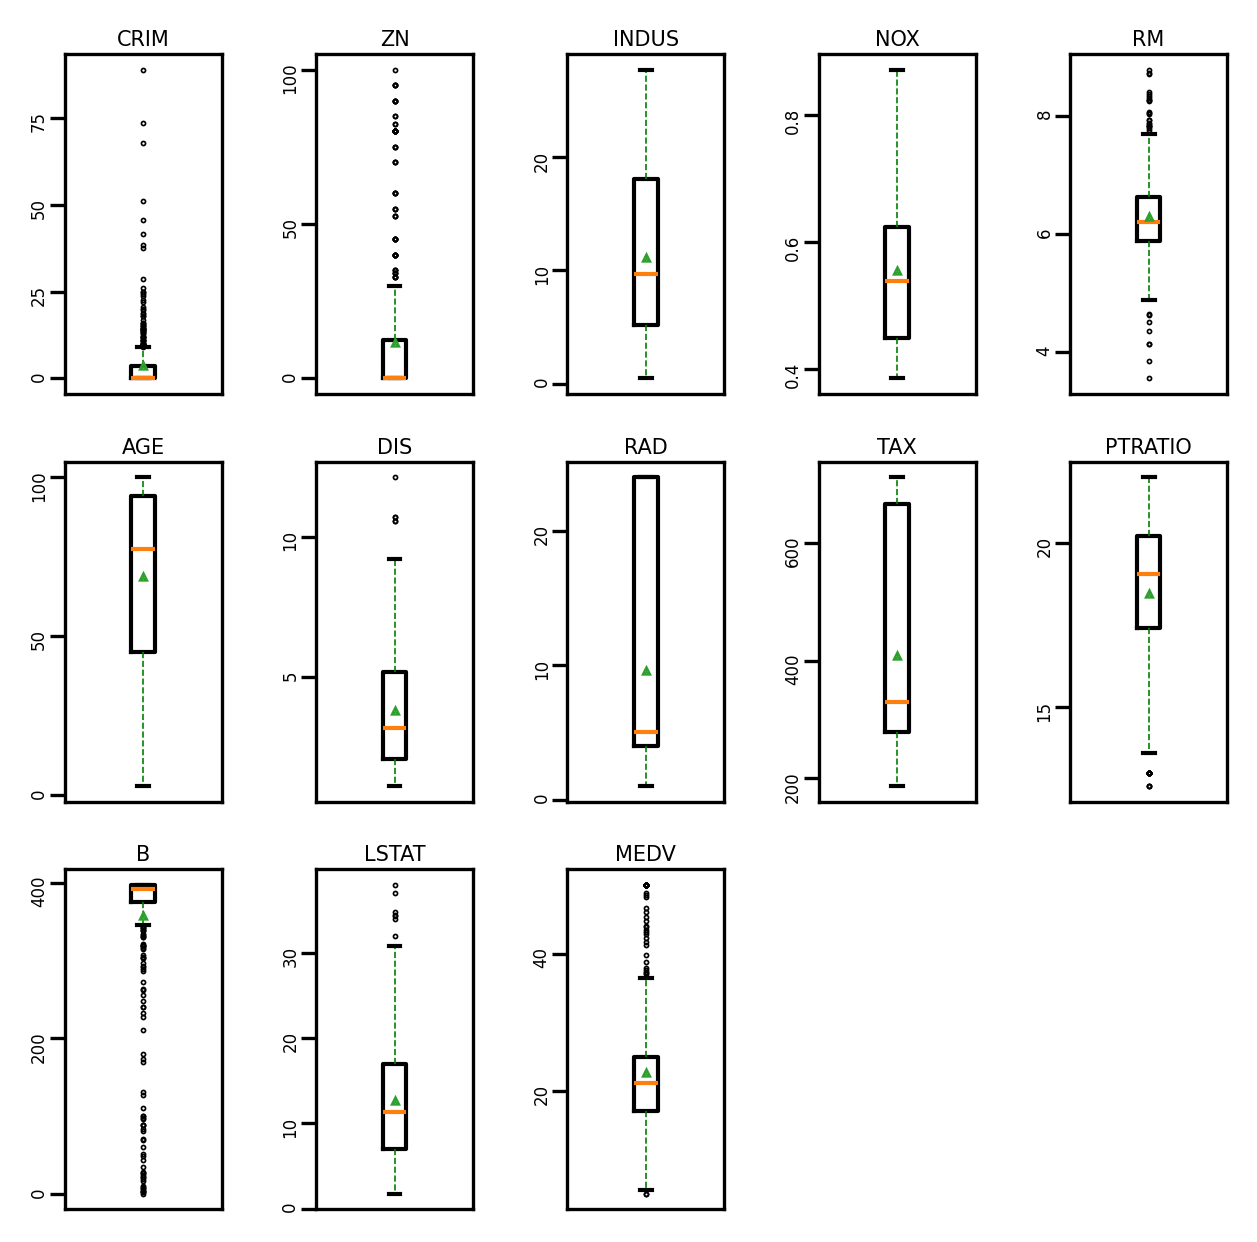

In [18]:
# 箱线图查看异常值分布
import matplotlib.pyplot as plt

def draw_boxplot(data):
    # 绘制除了 CHAS 属性之外的每个属性的箱线图
    data_col = list(data.columns)
    data_col.remove("CHAS")

    # plt.figure(figsize=(2, 9), dpi=400)
    plt.figure(figsize=(5, 5), dpi=300)
    plt.subplots_adjust(wspace=0.6)
    for i, col_name in enumerate(data_col):
        plt.subplot(3, 5, i+1)
        plt.boxplot(data[col_name], 
                    showmeans=True, 
                    whiskerprops={"color":"g", "linewidth":0.4, 'linestyle':"--"},
                    flierprops={"markersize":0.4},
                    meanprops={"markersize":1})
        plt.title(col_name, fontdict={"size":5}, pad=2)
        plt.yticks(fontsize=4, rotation=90)
        plt.tick_params(pad=0.5)
        plt.xticks([])

    plt.show()
draw_boxplot(data)

使用四分位值筛选出箱线图中分布的异常值，并将这些数据视为噪声，其将被临界值取代，不参与后续训练，代码实现如下。

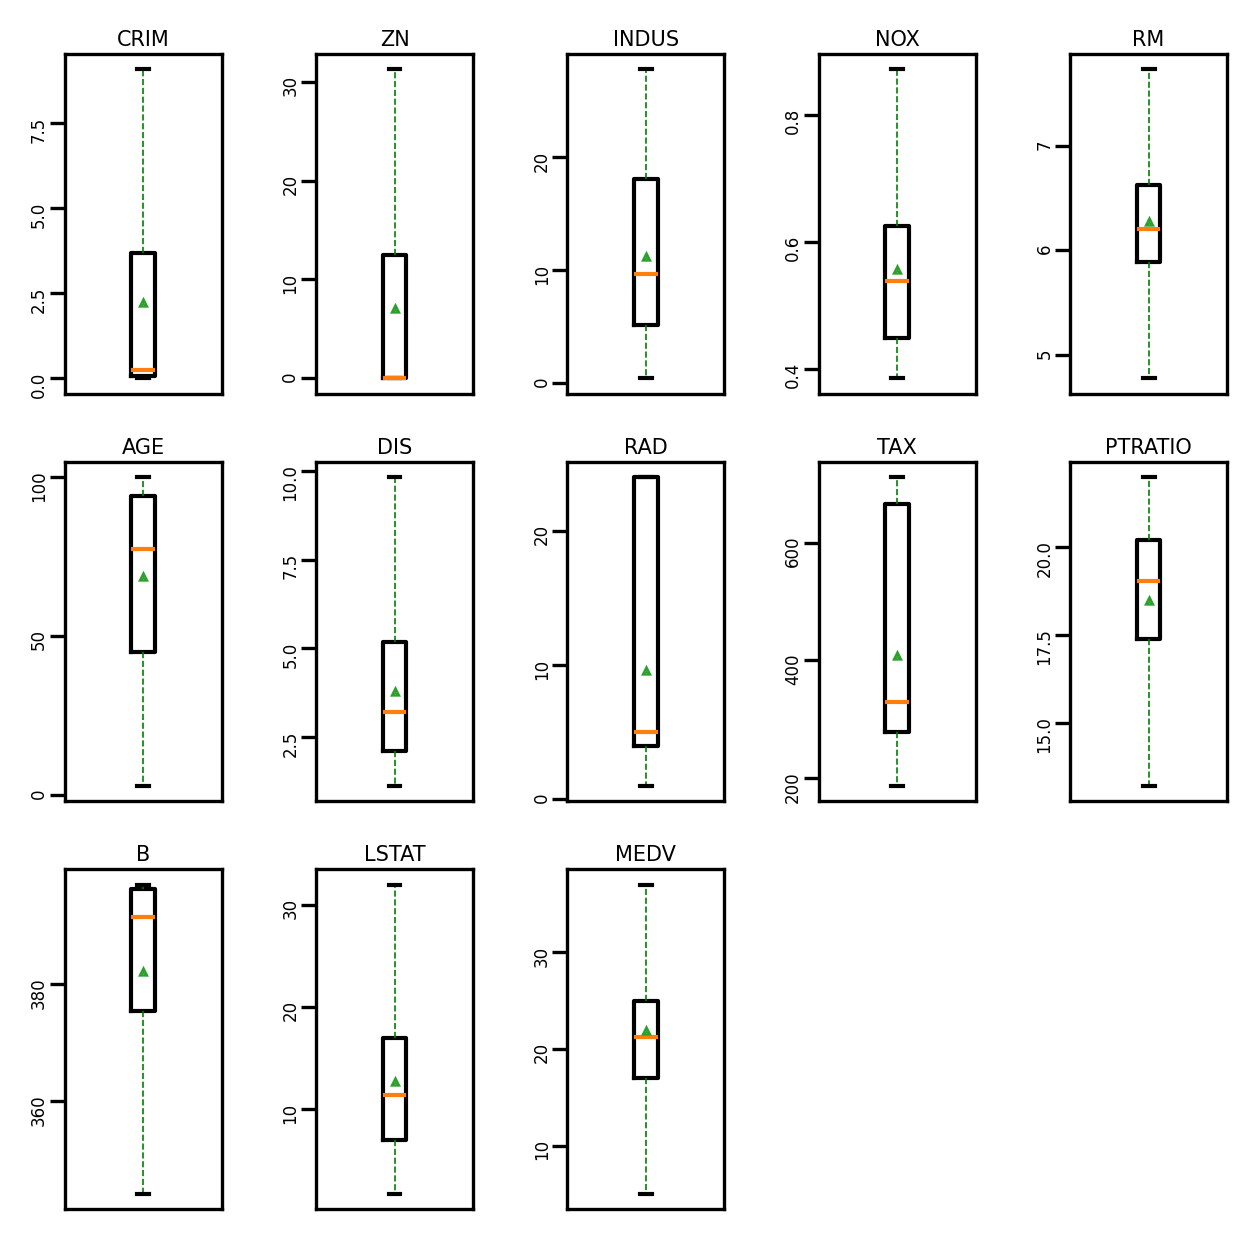

In [19]:
# 四分位处理异常值
num_features=data.select_dtypes(exclude=['object','bool']).columns.tolist()
for feature in num_features:

    ## 在下面补充2句代码，分别获取第1和第3个四分位  
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    
    IQR = Q3-Q1
    top = Q3+1.5*IQR
    bot = Q1-1.5*IQR
    values=data[feature].values
    values[values > top] = top
    values[values < bot] = bot
    data[feature] = values.astype(data[feature].dtypes)
draw_boxplot(data)

### 2.1.3 数据集划分 

合适的测试集可让模型具有更好泛化性，本实验将数据集划分为两份：

* 训练集：用于模型训练时调整模型的参数，在这份数据集上的误差被称为训练误差；
* 测试集：模型在这份数据集上的误差被称为测试误差。训练模型的目的是为了通过从训练数据中找到规律来预测未知数据，因此测试误差是更能反映出模型表现的指标。

数据划分时要考虑到两个因素：更多的训练数据会降低参数估计的方差，从而得到更可信的模型；而更多的测试数据会降低测试误差的方差，从而得到更可信的测试误差，因此本实验训练集和测试集的划分比例为8:2。  

---
**说明：**

在更复杂的模型训练过程中，往往还使用验证集。因为复杂的模型中常常还有一些超参数（Hyperparameter）需要调节，因此需要尝试多种超参数的组合来分别训练多个模型，然后对比它们在验证集上的表现，选择一组相对最好的超参数，最后才使用这组参数下训练的模型在测试集上评估测试误差。由于本实验训练的模型比较简单，因此暂且忽略掉这个过程。

---

In [23]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train:", X_train)
print("X_test:", X_test)

X_train:          CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
220  0.358090   0.00   6.20     0  0.507  6.951  88.5  2.8617    8  307   
71   0.158760   0.00  10.81     0  0.413  5.961  17.5  5.2873    4  305   
240  0.113290  30.00   4.93     0  0.428  6.897  54.3  6.3361    6  300   
6    0.088290  12.50   7.87     0  0.524  6.012  66.6  5.5605    5  311   
417  9.069639   0.00  18.10     0  0.679  5.304  89.1  1.6475   24  666   
..        ...    ...    ...   ...    ...    ...   ...     ...  ...  ...   
323  0.283920   0.00   7.38     0  0.493  5.708  74.3  4.7211    5  287   
192  0.086640  31.25   3.44     0  0.437  7.178  26.3  6.4798    5  398   
117  0.150980   0.00  10.01     0  0.547  6.021  82.6  2.7474    6  432   
47   0.229270   0.00   6.91     0  0.448  6.030  85.5  5.6894    3  233   
172  0.139140   0.00   4.05     0  0.510  5.572  88.5  2.5961    5  296   

     PTRATIO          B  LSTAT  
220     17.4  391.70000   9.71  
71      19.2  376.94000 

### 2.1.4 特征工程

为了消除纲量对数据特征之间影响，在模型训练前，需要对特征数据进行归一化处理，将数据缩放到[0, 1]区间内，使得不同特征之间具有可比性。

对于某些对"距离"敏感的模型来说，不同纲量的特征往往会导致模型产生较大的误差，因此需要对特征进行归一化处理，使得各指标之间处于同一数量级，以保证模型训练的准确性。
除了本实验中使用的线性回归外，还有逻辑回归、支持向量机、K均值聚类、神经网络模型等，都需要进行特征归一化处理。

In [25]:
## 在下面补充3句代码，对X_train和X_test进行归一化处理
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

print("x_train:", x_train)
print("x_test:", x_test)

x_train: [[0.03881249 0.         0.21041056 ... 0.47727273 0.90150349 0.26395435]
 [0.01681945 0.         0.37939883 ... 0.68181818 0.62192494 0.26957744]
 [0.01180252 0.96       0.1638563  ... 0.38636364 0.89297976 0.31919292]
 ...
 [0.01596104 0.         0.35007331 ... 0.52272727 0.95472949 0.28346978]
 [0.02459916 0.         0.23643695 ... 0.53409091 0.92120279 0.56462416]
 [0.01465468 0.         0.13159824 ... 0.38636364 1.         0.42867775]]
x_test: [[0.0067216  0.         0.10190616 ... 0.42045455 0.58915591 0.1855619 ]
 [1.         0.         0.64662757 ... 0.79545455 0.41754469 0.2580005 ]
 [0.01190844 0.         0.49230205 ... 0.36363636 0.94014443 0.29008517]
 ...
 [0.01577788 0.8        0.17118768 ... 0.73863636 0.96609447 0.37773919]
 [0.01480694 0.         0.37133431 ... 0.61363636 0.78993726 0.25303895]
 [0.01342775 0.         0.29692082 ... 0.875      0.96855688 0.34863144]]


## 2.2 模型训练

导入`LR`模型，使用`fit`函数进行模型训练。

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

## 2.3 模型评估  

在测试集上使用均方误差损失函数（mean_squared_error，MSE）对模型性能进行评估，代码实现如下。

In [ ]:
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', np.sqrt(mse))

MSE: 4.444430674499587


## 2.4 模型保存  

将模型参数保存到磁盘，用于模型推理或继续训练。

In [ ]:
import joblib    
joblib.dump(lr_model, 'Exp05lr_model.pkl')

['Exp05lr_model.pkl']

## 2.5 模型推理  

加载保存好的模型，使用`predict`对测试集中第一组数据进行推理，代码实现如下。

In [ ]:
lr_model = joblib.load('Exp05lr_model.pkl') 
lr_model.predict(x_test[:1])

array([25.48893637])